Shape of dataset: (102599, 26)

Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Missing Values:
 id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy     

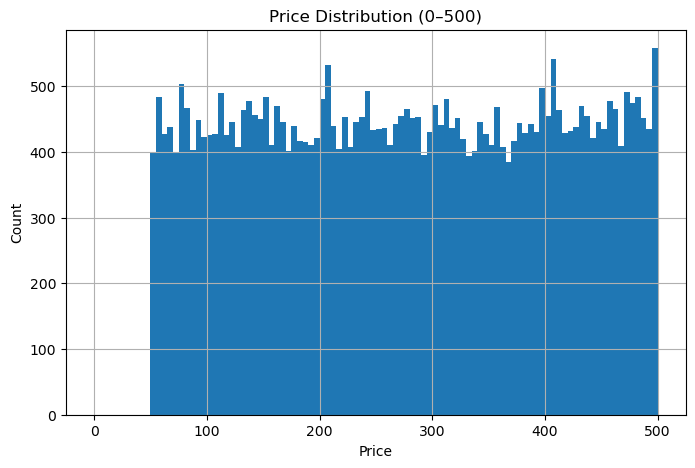

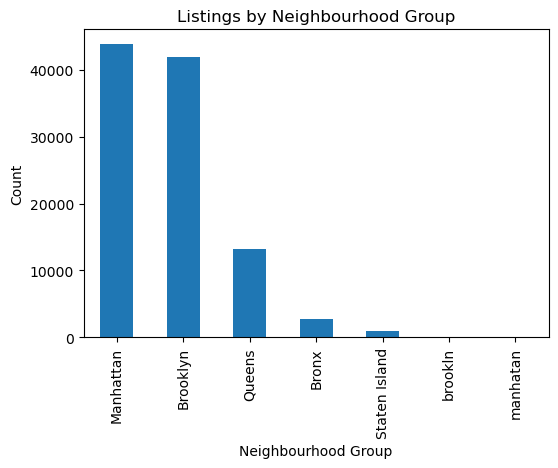

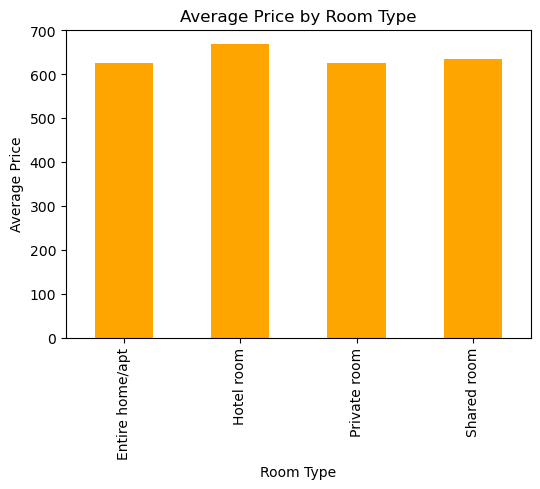

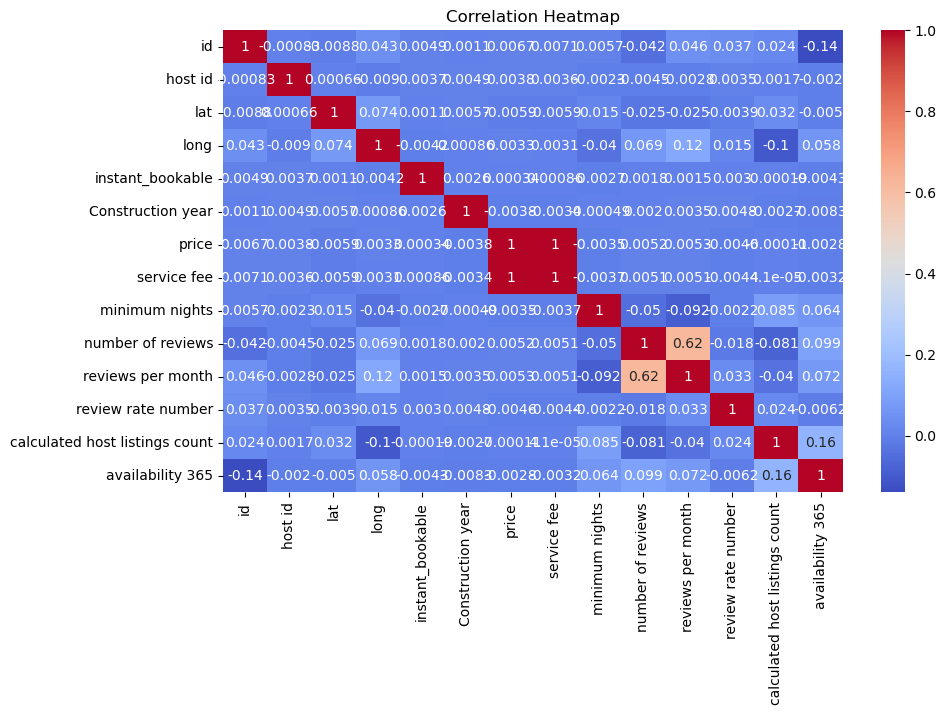

In [6]:
# ------------------------------
# Airbnb Data Analysis Script
# ------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel(r"C:\Users\supar\Downloads\1730285881-Airbnb_Open_Data.xlsx")

# ------------------------------
# 1. BASIC EXPLORATION
# ------------------------------
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include="all"))

# ------------------------------
# 2. DATA CLEANING
# ------------------------------
# Drop license column (almost empty)
if "license" in df.columns:
    df = df.drop(columns=["license"])

# Fill missing values
df["reviews per month"] = df["reviews per month"].fillna(0)
df["last review"] = df["last review"].fillna("No Review")

# ------------------------------
# 3. DESCRIPTIVE ANALYSIS
# ------------------------------
print("\nRoom Type Distribution:\n", df["room type"].value_counts())
print("\nAverage Price by Neighbourhood Group:\n",
      df.groupby("neighbourhood group")["price"].mean())

print("\nAverage Price by Room Type:\n",
      df.groupby("room type")["price"].mean())

print("\nTop 10 Hosts with Most Listings:\n",
      df["host name"].value_counts().head(10))

# ------------------------------
# 4. VISUALIZATIONS
# ------------------------------

# Price distribution
plt.figure(figsize=(8, 5))
df["price"].hist(bins=100, range=(0, 500))
plt.title("Price Distribution (0–500)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Listings by neighbourhood group
plt.figure(figsize=(6, 4))
df["neighbourhood group"].value_counts().plot(kind="bar")
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()
# Average price by room type
plt.figure(figsize=(6, 4))
df.groupby("room type")["price"].mean().plot(kind="bar", color="orange")
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
